# Robustness

So far we have investigated:
- how controllers can increase the performance of a system (using root locus to place closed-loop poles, using loop shaping to design sensitivity function to improve reference tracking), 
- how controllers can attenuate the effects of disturbances (using loop shaping to design sensitivity)
- how controllers can be designed to mitigate the effects of sensor noise (using loop shaping to design complementary sensitivity function)

Now we will look briefly at:
- Effects of parameter variations on closed-loop performance
- How controllers can be designed such that they are robust to parameter variations.



# There are three aspects to robustness:
1. The one problem when implementing a control system is the risk of instability. We want to make sure that we are not implementing a controller that is "close" to being unstable, or likely to go unstable.
2. We want to know if the controller will still work if the plant changes (more people get in the car for example).
3. We designed a controller based on a model that is an approximation of reality. We want to know if it will work on the real plant. 

# New Concepts
- Magnitude of resonance peak (video)
- location of resonance peak (video)
- Stability Margin
- Gain and Phase margins
- Sensitivity analysis

# Question: Will a slight change in the plant dynamics cause the closed-loop system to drastically change?

In the following text I present a derivation of a result that will answer this question!

The closed loop transfer function from $r$ to $y$ is
$$
T(s) = \frac{K(s)P(s)}{1 + K(s)P(s)}
$$
Take the derivative of $T$ with respect to $P$:
$$
\begin{align*}
\frac{dT}{dP} &= \frac{K}{1 + PK} + \frac{-PK}{(1+PK)^{2}}K \\
&= \frac{K(1+PK) - PK^2}{(1+PK)^2} \\
&= \frac{K}{(1+PK)^2} \\
&= \frac{1}{1 + PK}\frac{PK}{1+PK}\frac{1}{P} \\
&= S T \frac{1}{P}
\end{align*}
$$
Note that a derivative is approximately equal to
$$
\frac{dT}{dP} \approx \frac{\Delta T}{\Delta P}, 
$$
where $\Delta T = T + \delta$, where $\delta$ is small. Substitute this into the expression:
$$
\begin{align*}
\frac{\Delta T}{\Delta P} &= S T \frac{1}{P} \\
\frac{\Delta T}{T} = S \frac{\Delta P}{P}.
\end{align*}
$$


# What does this equation tell us?

- $\frac{\Delta T}{T}$ is the relative (normalized) change in $T$
- $\frac{\Delta P}{P}$ is the relative (normalized) change in $P$

Conclusion: a relative change in $P$ results in a relative change in $T$, where the magnitude of the change is governed by the sensitivity function!

For example, if $S$ is small (in a particular frequency range) then a relative change in $P$ (in that particular frequency range) will result in a small relative change in the closed loop transfer function $T$ (in that particular frequency range).

Problems can happen when $S$ is big. 


# A bound on $S$

The frequency domain representation of $S$ is bounded by its maximum value:
$$
S(j\omega) \le M_s
$$
where 
$$
M_s = \max_{\omega} S(j \omega).
$$

The value $M_s$ is a measure of the sensitivity of the closed loop system to changes in $P$. If $M_s$ is big, then our system is very sensitive to changes in $P$ (not very robust).

Acceptable values for $M_s$ are often considered to be $M_s < 2$. 

# What property of the (closed-loop) system will result in a system with a large value for $M_s$?

For second order systems we have an exact interpretation!

The maximum of the sensitivity occurs either at $\omega=\infty$, or at the resonance peak. 

From the videos we know that as we move closer to the imaginary axis, the magnitude of the resonance peak get larger.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import control as ct
import matplotlib.animation as manimation

In [2]:
# don't worry about the code in this cell, it is just to let you 
# display the movies you generated above in Jupyter notebook
from IPython.display import HTML

HTML("""
<div align="middle">
<video width="80%" controls>
      <source src="growing resonance peak.mp4" type="video/mp4">
</video></div>""")

# So we have the following reasoning:

From the sensitivity analysis, we know that a large value in the sensitivity function results in a non-robust system.

For second order systems:
- A large value in the sensitivity function is due to poles that are close to the imaginary axis
- Poles that are close to the imaginary axis are close to being unstable
- A small change in $P$ could move the closed loop poles across the imaginary axis
- There is a large difference in output behavior between a stable system and an unstable system! (This is what non-robust means)


![moving poles](movingPoles.png "Moving Poles")

# For General Systems

The previous reasoning held for second order systems. However, it is still true that large values in the sensitivity function lead to non-robust systems, and could easily lead to unstable systems even for only small changes in the plant dynamics. 

So $M_s$, the maximum value of the sensitivity is a measure of robustness, and can also be thought of as a stability margin (how close are we to an unstable system).

Rule of thumb: Keep $M_s < 2$.

# Other Stability Margins

Stability margins can be thought of as safety factors.

Two classic stability margins are the *Gain Margin* and the *Phase Margin*.

# Gain Margin

Gain Margin is the smallest factor that the plant can be multiplied by before the closed loop system goes unstable. 

In equations, we are considering multiplying the plant by a number $n_{gm} P(s)$. How big can $n_{gm}$ be, before the system becomes unstable?

From studying Root Locus plots, we already have seen that for some systems, increasing the proportional gain ($K_p$) can make a system go unstable. 

I think that the proper way to think about $n_{gm}$ is like a safety factor. It is an indication of how much cushion we have before we run into trouble. 

# Determining the Gain Margin of a System

It is easiest to determine the gain margin from a Bode Plot of the Loop Transfer function $L(j \omega)$.

The closed-loop transfer function from $r$ to $y$ expressed in frequency domain is:
$$
T(j \omega) = \frac{K(j \omega)P(j \omega)}{1 + K(j \omega)P(j \omega)}
$$
When $K(j \omega)P(j \omega) = -1$ the system is unstable. 

Recall that the loop transfer function $L(j \omega) = K(j \omega)P(j \omega)$.

$L(j \omega)$ is a complex number and can be expressed as $M e^{\phi}$. 

Note that when $M=1$ and $\phi = -180$, $L(j \omega) = 1 e^{-\pi} = -1$.

Therefore, if there is any frequency on the Bode plot of $L(j \omega)$ where it has a magnitude of $1$ and a phase of $-180$, then the system is unstable. 


# Determining Gain Margin

1. Make Bode plot of $L$. 
2. Is there a point where $L$ has phase $-180$?
3. If yes, denote this point $L(\omega_{pc})$. This frequency is called the *phase crossover frequency*.
4. What is the magnitude of $L$ at the frequency $\omega_{pc}$? Denote this magnitude $M_{pc}$.
5. By how much can we multiply $M_{pc}$ before it is equal to 1 (and the system becomes unstable)?

The number that we calculate in Step 5 is the Gain Margin.


Recall that scaling a transfer function by a factor $X$ corresponds to adding a constant value of $\log(X)$ to the magnitude plot because the magnitude plot is logarithmic:
$$
\log( |X G(j \omega)| ) = \log(|X|) + \log(|G(j \omega)|) 
$$

In [3]:
# don't worry about the code in this cell, it is just to let you 
# display the movies you generated above in Jupyter notebook
from IPython.display import HTML

HTML("""
<div align="middle">
<video width="80%" controls>
      <source src="Gain margin.mp4" type="video/mp4">
</video></div>""")

# Phase Margin


The *Phase Margin* is the amount of phase lag (delay) required before the closed loop system goes unstable.

# What doe phase lag represent?

The "phase" of a signal or system is equivalent to delay of a signal. 

Consider a sinusoid:
$$
sin(\omega t)
$$
and a sinusoid where we have changed the phase:
$$
sin(\omega t - \phi)
$$

Positive phase shift is a phase lead, and negative phase shift is a phase lag.

Text(0.5, 0, 'Time (s)')

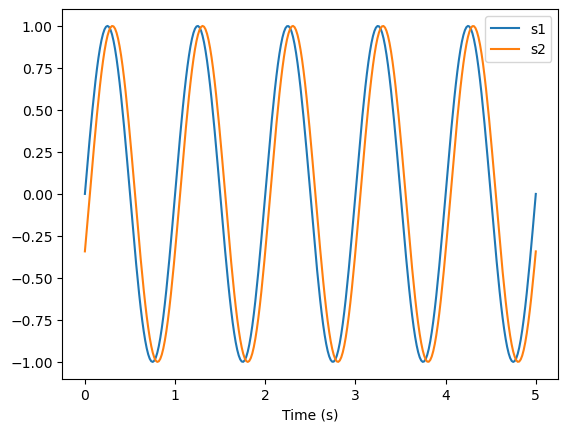

In [3]:
t = np.linspace(0,5,300)
f = 1
s1 = np.sin(2*np.pi*f*t)
s2 = np.sin(2*np.pi*f*t - np.pi/9)
fig,ax = plt.subplots(1)
ax.plot(t,s1, label='s1')
ax.plot(t,s2, label='s2')
ax.legend()
ax.set_xlabel('Time (s)')

$s_2$ lags $s_1$, or equivalently, $s_2$ is a delayed version of $s_1$.

# Examples where adding delay can be detrimental

Inverted pendulum - if the controller has a delay, and is too slow to react, it cannot balance the pendulum upside down

Car Steering - if the controller has a large delay, a disturbance can lead to increasing oscillations.

# Determining the Phase Margin of a System

Recall that if $L(j \omega)$ has an amplitude of $1$ and a phase of $-180$ degrees, the closed loop system is unstable.

1. Make Bode plot of $L$. 
2. Is there a point where $L$ has magnitude of $1$?
3. If yes, denote this point $L(\omega_{gc})$. The frequency $\omega_{gc}$ is called the *gain crossover frequency*. 
4. What is the phase of $L$ at the frequency $\omega_{gc}$? Denote this phase $\phi_{gc}$.
5. How much phase can we subtract from the system before it equals $-180$ degrees at $\omega_{gc}$?

The number that we calculate in Step 5 is the Phase Margin.

Subtracting phase (or adding delay) does not affect the Magnitude plot, and is equivalent to shifting the entire phase plot down.

In [4]:
# don't worry about the code in this cell, it is just to let you 
# display the movies you generated above in Jupyter notebook
from IPython.display import HTML

HTML("""
<div align="middle">
<video width="80%" controls>
      <source src="Phase margin.mp4" type="video/mp4">
</video></div>""")

# Accepted Gain and Phase Margins

- Acceptable phase margins to ensure robustness are greater than 30 degrees
- Acceptable gain margins to ensure robustness are greater than 6dB (which corresponds to a scaling factor of 2)


# Example 1 - Gain, Phase and Stability Margins

Consider the plant $P(s) = \frac{1}{s^3 + 3s^2 + 4s + 2}$ and PI controller $K(s) = 1 + \frac{1}{s}$.

Stability margin: 1.5835754243171118


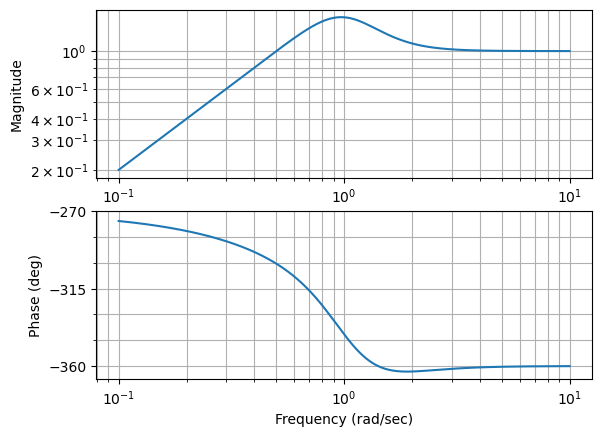

In [18]:
P = ct.tf([1], [1, 3, 4, 2])
K = ct.tf(1,1) + ct.tf(1,[1, 0])

S = 1/(1+P*K)

mag,phase,w = ct.bode_plot(S)

Ms = np.max(mag)
print( 'Stability margin:', Ms)

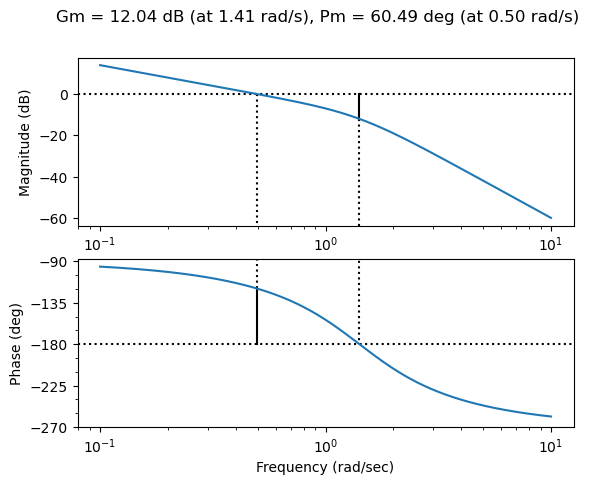

In [19]:
L = P*K

mag, phase, w = ct.bode_plot(L, margins=True, dB=True)

For this plant and controller all the margins are within acceptable levels.

# Example 2 - Gain, Phase and Stability Margins

Consider the plant $P(s) = \frac{1}{(s+1)(s^2 + 0.06s + 0.5)}$ and PID controller $K(s) = 0.038 + \frac{0.209}{s} + 0.38 s$.

Stability margin: 3.6561684351439108


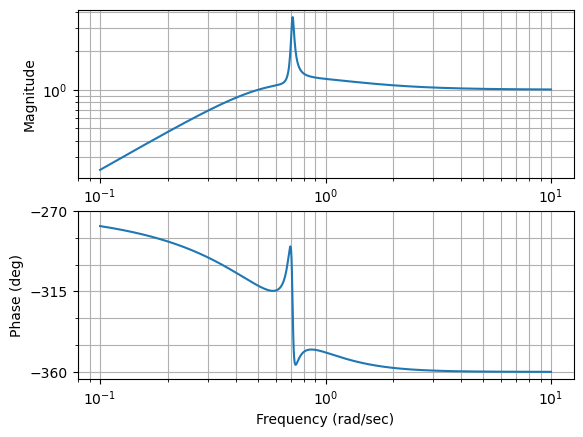

In [22]:
P = ct.tf([1], [1, 1.06, 0.56, 0.5])
K = ct.tf(0.038,1) + ct.tf(0.209,[1, 0]) + ct.tf([0.38, 0], 1)

S = 1/(1+P*K)

mag,phase,w = ct.bode_plot(S)

Ms = np.max(mag)
print( 'Stability margin:', Ms)

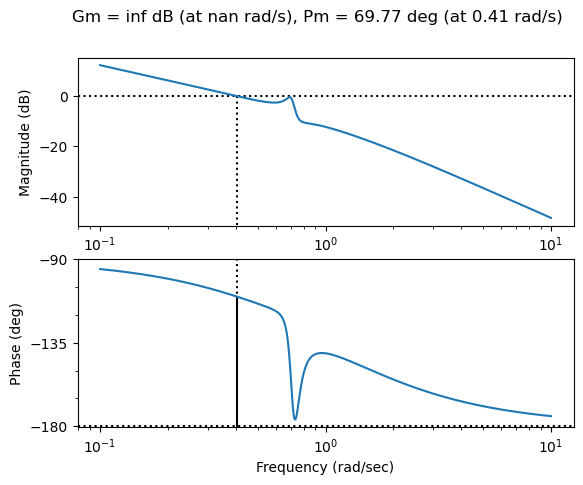

In [23]:
L = P*K

mag, phase, w = ct.bode_plot(L, margins=True, dB=True)

In this example, the Gain and Phase margins are misleading, they appear to indicate a very robust system. However, as can be seen from the stability margin, the system is not very robust. 

A clue to this non-robustness can also be seen in the Bode plot of the loop transfer function. The resonant peak is very close to $1$, and the phase at that frequency is very close to -180 degrees.

# Conclusion

In this lecture we:
- showed that the sensitivity function governs how changes in the plant $P$ affect changes in the closed loop transfer function $T$.
- Derived the stability margin which represents the maximum sensitivity of a closed loop system $M_s = \max_{\omega} S(j \omega)$.
- Presented Gain and Phase margins which are additional metrics to characterize the robustness of a closed-loop system.
- Looked at two examples